# Linkedin Analysis

#### The data is about jobs posted on Linkedin for few months in 2022. 
Data link `https://www.kaggle.com/datasets/cedricaubin/linkedin-data-analyst-jobs-listings`

### Loading packages and files

In [51]:
#loading packages 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#loading the three files
df_afr = pd.read_csv('linkedin-jobs-africa.csv')
df_usa = pd.read_csv('linkedin-jobs-usa.csv')
df_can = pd.read_csv('linkedin-jobs-canada.csv')

In [53]:
# Adding region column for each file 
df_afr['region'] = 'Africa'
df_usa['region'] = 'USA'
df_can['region'] = 'Canada'

In [54]:
# Combining the 3 regions in 1 dataframe
df = pd.concat([df_afr,df_usa,df_can],ignore_index = True)

In [55]:
#checking the columns and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          8490 non-null   object
 1   company        8490 non-null   object
 2   description    8490 non-null   object
 3   onsite_remote  8490 non-null   object
 4   salary         965 non-null    object
 5   location       8490 non-null   object
 6   criteria       8490 non-null   object
 7   posted_date    8490 non-null   object
 8   link           8490 non-null   object
 9   region         8490 non-null   object
dtypes: object(10)
memory usage: 663.4+ KB


### Sorting the nested text column

In [56]:
#exploring the nested data in criteria column
df.criteria[2]

"[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Analyst'}, {'Industries': 'Technology, Information and Internet'}]"

In [57]:
#exporting the data as dictionary
import json
import ast
df['criteria'] = df['criteria'].apply(lambda x: ast.literal_eval(str(x)))

In [58]:
df.iloc[1,6][3]

{'Industries': 'Financial Services'}

In [59]:
# dividing the dictionary into 3 lists
list1 = []
list2 = [] 
list3 = [] 
list4 = []
for i in range(len(df)):
    try:
        list1.append(list(df.iloc[i,6][0].values()))
        list2.append(list(df.iloc[i,6][1].values()))
        list3.append(list(df.iloc[i,6][2].values()))
        list4.append(list(df.iloc[i,6][3].values()))
    except:
        pass 

In [60]:
# comibine the lists into one dataframe
lists = pd.concat([pd.DataFrame(list1),pd.DataFrame(list2),pd.DataFrame(list3)],ignore_index=True,axis=1)
lists.columns = ['level','contract','field']

In [61]:
#removing the nested column and replace it with the new 3 columns 
df = pd.concat([df.drop(['link','criteria'], axis=1),lists],axis=1)

In [62]:
df.head()

,title,company,description,onsite_remote,salary,location,posted_date,region,level,contract,field
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt",2022-11-18,Africa,غير مطبق,دوام كامل,محلل
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya",2022-11-01,Africa,Associate,Full-time,Analyst
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa",2022-11-21,Africa,Not Applicable,Full-time,Analyst
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,NaN,"Nairobi, Nairobi County, Kenya",2022-11-01,Africa,Mid-Senior level,Full-time,Information Technology
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,NaN,"City of Johannesburg, Gauteng, South Africa",2022-10-27,Africa,Mid-Senior level,Contract,Information Technology


### Sorting the date column

In [63]:
# Converting the posted date to date format
df['posted_date'] = pd.to_datetime(df['posted_date'])

In [64]:
# Creating seperate dataframe for dates for further analysis
dated_data = df[['posted_date','title']]
dated_data['year'] = dated_data['posted_date'].dt.strftime('%Y')
dated_data['month'] = dated_data['posted_date'].dt.strftime('%m')
dated_data.drop('title',axis=1,inplace=True)

C:\Users\mina.aziz\AppData\Local\Temp\ipykernel_21628\180065624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dated_data['year'] = dated_data['posted_date'].dt.strftime('%Y')
C:\Users\mina.aziz\AppData\Local\Temp\ipykernel_21628\180065624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dated_data['month'] = dated_data['posted_date'].dt.strftime('%m')
C:\Users\mina.aziz\AppData\Local\Temp\ipykernel_21628\180065624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [65]:
# The data seams to be not complete and has a very short scope
dated_data.groupby(['year','month']).count().reset_index()

,year,month,posted_date
0,2022,05,1
1,2022,07,2
2,2022,08,4
3,2022,09,77
4,2022,10,1865
5,2022,11,6541


### Descriptive Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Analyst'),
  Text(1, 0, 'Junior Data Analyst'),
  Text(2, 0, 'Senior Data Analyst'),
  Text(3, 0, 'Remote Data Analyst Jobs'),
  Text(4, 0, 'Data Analyst - Recent Graduate'),
  Text(5, 0, 'Data Engineer'),
  Text(6, 0, 'Data Analyst, Forward Kitchens (Remote) - $60,000/year USD'),
  Text(7, 0, 'Data Analyst/Developer'),
  Text(8, 0, 'Commercial Data Analyst'),
  Text(9, 0, 'Data Analyst, Trilogy (Remote) - $60,000/year USD')])

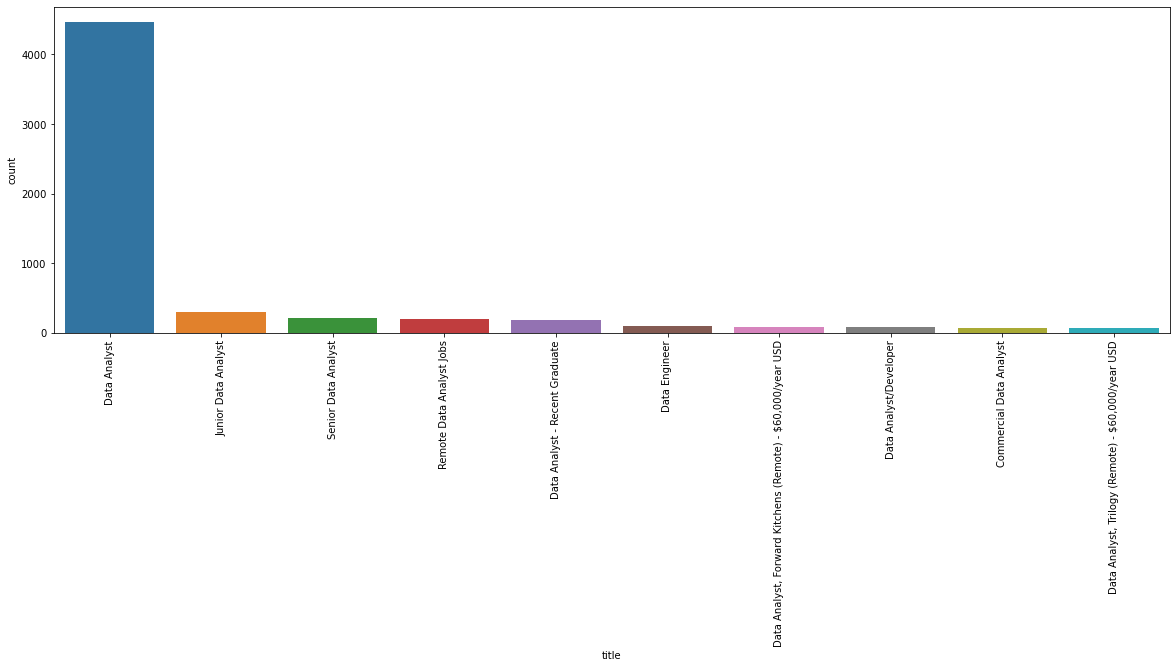

In [66]:
# top 10 posted job title posted. Data Analyst is the most title used### Loading packages and files
top_10 = df.groupby('title').count().reset_index()[['title','company']].sort_values('company',ascending=False).head(10)
top_10.columns = ['title','count']
plt.figure(figsize=(20,6))
sns.barplot(x='title',y='count',data=top_10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Toronto, Ontario, Canada'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Cape Town, Western Cape, South Africa'),
  Text(3, 0, 'Mississauga, Ontario, Canada'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Johannesburg, Gauteng, South Africa'),
  Text(6, 0, 'South East, South-East District, Botswana'),
  Text(7, 0, 'Lagos, Lagos State, Nigeria'),
  Text(8, 0, 'City of Johannesburg, Gauteng, South Africa'),
  Text(9, 0, 'New York City Metropolitan Area')])

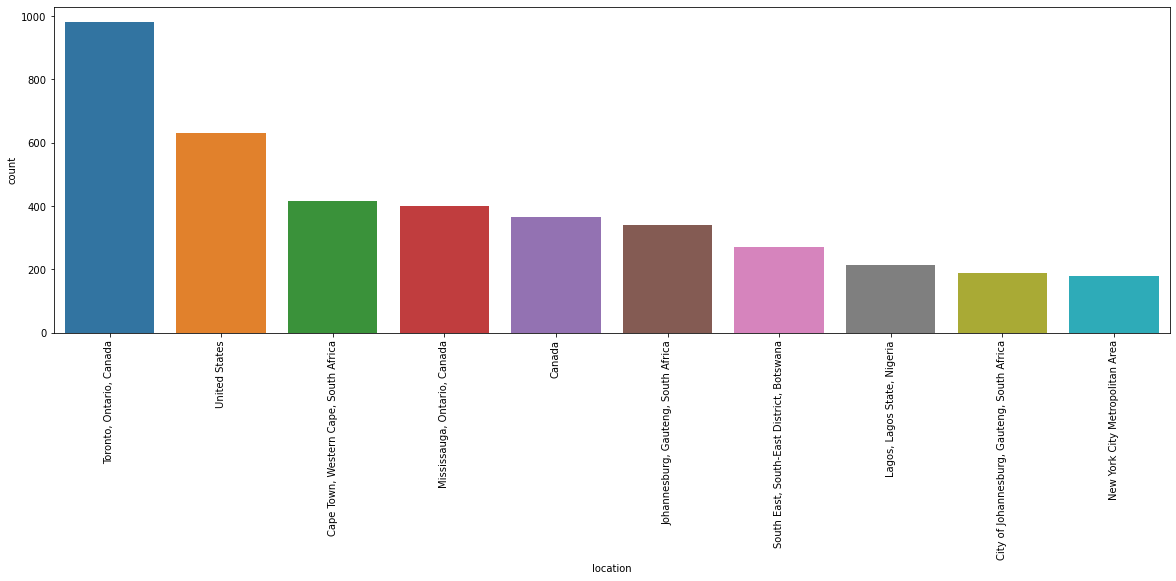

In [67]:
# top 10 locations posted jobs. Toronto, Ontario, Canada with the most posted jobs
top_places = df.groupby('location').count().reset_index()[['location','company']].sort_values('company',ascending=False).head(10)
top_places.columns = ['location','count']
plt.figure(figsize=(20,6))
sns.barplot(x='location',y='count',data=top_places)
plt.xticks(rotation=90)

In [68]:
#mapping the data to have same words
df['contract'] = df['contract'].map({'دوام كامل':'Full-time','Contract':'Full-time','Temporary':'Temporary',
                                     'Internship':'Internship','Other':'Other'})

In [69]:
df['contract'].unique()

array(['Full-time', nan, 'Temporary', 'Internship', 'Other'], dtype=object)

,contract,count
0,Full-time,1410
3,Temporary,76
2,Other,39
1,Internship,2


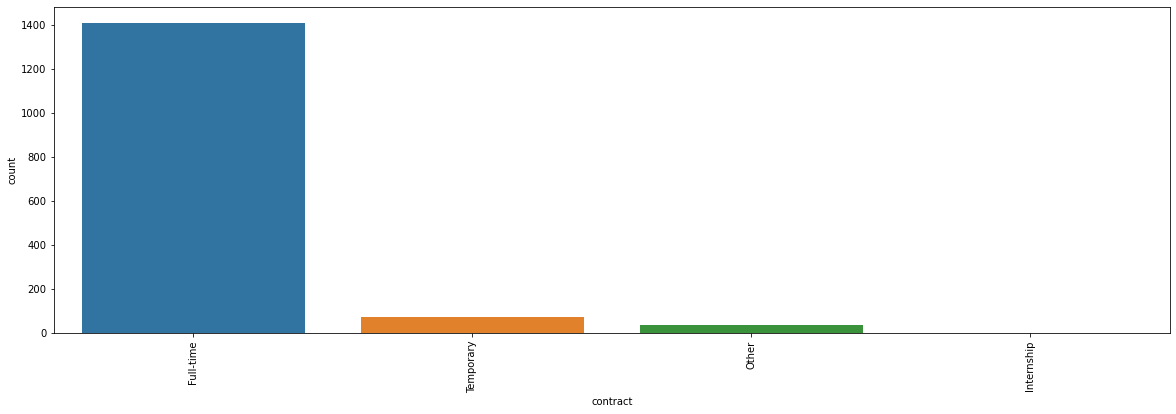

In [70]:
# count by the contract type. Showing the full time is by far the most jobs posted
contract_type = df.groupby('contract').count().reset_index()[['contract','company']].sort_values('company',ascending=False)
contract_type.columns = ['contract','count']
plt.figure(figsize=(20,6))
sns.barplot(x='contract',y='count',data=contract_type)
plt.xticks(rotation=90)
contract_type

In [71]:
# top 10 company with the number of posted jobs for each of them. Showing paypal has the most jobs posted by far difference
df[['company','location']].groupby('company').count().reset_index().sort_values('location',ascending=False).head(10)

,company,location
259,PayPal,499
355,Turing.com,211
90,Crossover,157
266,Progressive Edge,146
295,SSENSE,133
120,Experian,114
318,Synechron,110
171,Insight Global,106
108,Diverse Lynx,101
76,Citi,76


In [72]:
# count of job remote aspect posted. Showing that there are almost equal figures for the 3 types
df[['onsite_remote','location']].groupby('onsite_remote').count().reset_index().sort_values('location',ascending=False)

,onsite_remote,location
1,onsite,2897
0,hybrid,2825
2,remote,2768


In [78]:
df['field'].unique()

array(['محلل', 'Analyst', 'Information Technology',
       'تطوير الأعمال التجارية و تكنولوجيا المعلومات',
       'تكنولوجيا المعلومات', 'Supply Chain',
       'Information Technology and Analyst', 'التوزيع و سلسلة التوريدات',
       'الهندسة', 'الهندسة و تكنولوجيا المعلومات',
       'Research, Analyst, and Information Technology', 'الموارد البشرية',
       'غير ذلك', 'Business Development and Sales', 'Other',
       'Information Technology, Engineering, and Research',
       'Management, Analyst, and Human Resources',
       'Engineering, Information Technology, and Research',
       'Information Technology and Engineering',
       'Education, Science, and Health Care Provider',
       'Research, Science, and Analyst', 'Consulting',
       'Marketing and Sales', 'تكنولوجيا المعلومات و تكنولوجيا المعلومات',
       'Accounting/Auditing', 'Analyst, Science, and Strategy/Planning',
       'Information Technology and Other',
       'Research, Design, and Analyst',
       'Information Techn

In [83]:
#replacing the data to have same words
df['field'] = df['field'].str.replace('محلل','Analyst')
df['field'] = df['field'].str.replace('تطوير الأعمال التجارية و تكنولوجيا المعلومات','Information Technology, Strategy/Planning')
df['field'] = df['field'].str.replace('التوزيع و سلسلة التوريدات','Distribution, Chain Imports')
df['field'] = df['field'].str.replace('الهندسة و تكنولوجيا المعلومات','Engineering, Information Technology')
df['field'] = df['field'].str.replace('الهندسة','Engineering')
df['field'] = df['field'].str.replace('الموارد البشرية','Human Resources')
df['field'] = df['field'].str.replace('تكنولوجيا المعلومات','Information Technology')
df['field'] = df['field'].str.replace('غير ذلك','Information Technology')

,field,count,per
0,Information Technology,5093,79.12
1,Analyst,449,6.98
2,Information Technology and Analyst,246,3.82
3,Finance,153,2.38
4,"Strategy/Planning, Analyst, and Information Te...",104,1.62
5,Engineering,93,1.44
6,Other,79,1.23
7,"Information Technology, Engineering, and Research",75,1.17
8,"Engineering, Information Technology, and Research",74,1.15
9,Information Technology and Engineering,71,1.10


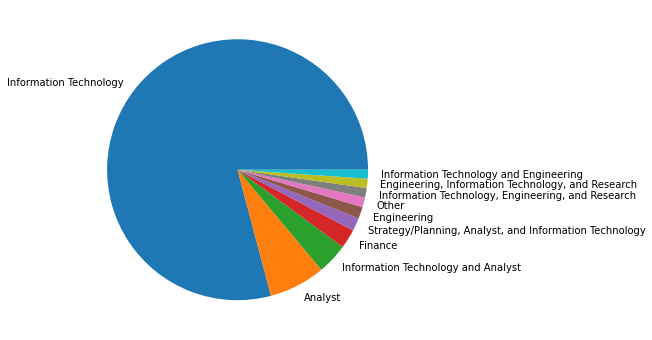

In [96]:
#most posted fields. Mostly the post is part of the IT department
field_top10 = df[['field','title']].groupby('field').count().sort_values('title',ascending=False).reset_index().head(10)
field_top10.columns = ['field', 'count']
field_top10['per'] = round((field_top10['count']/field_top10['count'].sum())*100,2)
plt.figure(figsize=(20,6))
plt.pie(field_top10['count'],labels=field_top10['field'])
plt.xticks(rotation=90)
field_top10